### Step 1: Visualize the Al-Fe Structure with ASE

In this step, we visualize the **Al-Fe** structure using the **ASE (Atomic Simulation Environment)** library. The bond distance between aluminum (Al) and iron (Fe) is set to **2.46 Å**, and we use ASE to generate and display the molecular geometry. This step helps us to understand the spatial arrangement of atoms in the Al-Fe system before performing further quantum computations.

#### Key Points:
- **Bond Distance**: The equilibrium bond distance between Al and Fe is **2.46 Å**.
- **Geometry Calculation**: The position of the Fe atom is calculated based on the bond distance, and the resulting geometry is visualized.
- **ASE Visualization**: ASE is used to generate a 3D visualization of the molecular structure, allowing us to view the positions of the atoms and their bonding.


### Step 3: Visualize the Al-Fe structure with lattice vectors

Visualizing Al-Fe Structure with lattice vectors and bond distance as per POSCAR


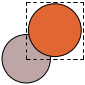

### Step 4: Define the Al-Fe molecule geometry and basis set

converged SCF energy = -1503.66158388086


In [1]:
import os
import numpy as np
from pyscf import gto, scf, mcscf
from ase import Atoms
from ase.visualize import view
from ase.io import write  # For saving geometry files
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import get_fermion_operator
from openfermion.linalg import eigenspectrum
from openfermion.transforms import jordan_wigner, bravyi_kitaev_tree
from IPython.display import display, Image, Markdown
# Qiskit imports
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2
from qiskit.primitives import StatevectorEstimator as Estimator, StatevectorSampler as Sampler

# Create a directory named 'AlFe_structure' if it doesn't exist
output_dir = 'AlFe_structure'
os.makedirs(output_dir, exist_ok=True)

# Function to display intermediate steps in Markdown format
def display_step(step_text):
    display(Markdown(f"### {step_text}"))
    
#equilibrium lattice constant = 2.86
# Step 1: Lattice Vectors and Atomic Positions from POSCAR
# Extract lattice vectors and positions from the given POSCAR-like format
lattice_vectors = np.array([
    [2.86, 0.0, 0.0],
    [0.0, 2.86, 0.0],
    [0.0, 0.0, 2.86]
])

# Atomic positions in fractional coordinates (Direct mode in POSCAR)
fractional_coords = np.array([
    [-0.0000000000000000, -0.0000000000000000, 0.0000000000000000],  # Al
    [0.50000000000000000, 0.50000000000000000, 0.5000000000000000]   # Fe
])

# Convert fractional coordinates to Cartesian coordinates using the lattice vectors
cartesian_coords = np.dot(fractional_coords, lattice_vectors)

# Atomic symbols corresponding to Al and Fe
symbols = ['Al', 'Fe']

# Step 2: Create the AlFe structure using ASE and lattice
def visualize_geometries_with_ase():
    # Create an Atoms object for the structure, using the Cartesian coordinates
    al_fe_atoms = Atoms(symbols=symbols, positions=cartesian_coords, cell=lattice_vectors, pbc=True)
    
    print(f"Visualizing Al-Fe Structure with lattice vectors and bond distance as per POSCAR")
    
    # Save the visualization to a PNG file
    initial_geom_file = os.path.join(output_dir, 'al_fe_lattice_atoms.png')
    write(initial_geom_file, al_fe_atoms)
    
    # Display the image in the notebook
    display(Image(filename=initial_geom_file))

    # Show an interactive 3D viewer
    view(al_fe_atoms)

# Step 3: Visualize the geometry using ASE
display_step("Step 3: Visualize the Al-Fe structure with lattice vectors")
visualize_geometries_with_ase()

# Step 4: Define the molecule geometry and basis set for PySCF
display_step("Step 4: Define the Al-Fe molecule geometry and basis set")

# PySCF expects Cartesian coordinates, which we've already calculated
# Defining the geometry for PySCF in angstrom units
geometry = [(symbols[i], tuple(cartesian_coords[i])) for i in range(len(symbols))]

# Basis set and charge for the AlFe system
basis = '6-31++G'  # Using LANL2DZ basis set for Fe and Al
charge = 0  # Neutral AlFe molecule

# Assuming Fe(II), which gives 24 electrons for Fe and 13 electrons for Al
# Total electron count: 37 electrons
# High-spin Fe(II) (3d6, 4 unpaired electrons) + Al (1 unpaired electron)
# Total unpaired electrons: 4 (Fe) + 1 (Al) = 5 unpaired electrons
# Spin = 2S = 5 for 5 unpaired electrons
spin = 5  # 2S = 5 for 5 unpaired electrons

# Step 5: Setup molecule and SCF calculation in PySCF
mol = gto.M(atom=geometry, basis=basis, charge=charge, spin=spin, unit='angstrom')
mf = scf.RHF(mol).run()


### Step 3: Visualize the Al-Fe structure without lattice vectors

Visualizing Al-Fe Structure with bond distance as per POSCAR


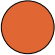

### Step 4: Define the Al-Fe molecule geometry and basis set

converged SCF energy = -1503.81025791764


In [1]:
import os
import numpy as np
from pyscf import gto, scf, mcscf
from ase import Atoms
from ase.visualize import view
from ase.io import write  # For saving geometry files
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import get_fermion_operator
from openfermion.linalg import eigenspectrum
from openfermion.transforms import jordan_wigner, bravyi_kitaev_tree
from IPython.display import display, Image, Markdown
# Qiskit imports
from qiskit.circuit.library import EfficientSU2, UCGate
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2
from qiskit.primitives import StatevectorEstimator as Estimator, StatevectorSampler as Sampler

# Create a directory named 'AlFe_structure' if it doesn't exist
output_dir = 'AlFe_structure'
os.makedirs(output_dir, exist_ok=True)

# Function to display intermediate steps in Markdown format
def display_step(step_text):
    display(Markdown(f"### {step_text}"))

# Step 1: Lattice Vectors and Atomic Positions from POSCAR
# Extract atomic positions (without lattice vectors)
cartesian_coords = [('Al', (0, 0, 0)), ('Fe', (0, 0, 2.44))]  # Bond distance ~0.74 Å
symbols = ['Al', 'Fe']

# Step 2: Create the AlFe structure using ASE
def visualize_geometries_with_ase():
    # Create an Atoms object for the structure, using the Cartesian coordinates
    al_fe_atoms = Atoms(symbols=[atom[0] for atom in cartesian_coords],
                        positions=[atom[1] for atom in cartesian_coords])
    
    print(f"Visualizing Al-Fe Structure with bond distance as per POSCAR")
    
    # Save the visualization to a PNG file
    initial_geom_file = os.path.join(output_dir, 'al_fe_atoms.png')
    write(initial_geom_file, al_fe_atoms)
    
    # Display the image in the notebook
    display(Image(filename=initial_geom_file))

    # Show an interactive 3D viewer
    view(al_fe_atoms)

# Step 3: Visualize the geometry using ASE
display_step("Step 3: Visualize the Al-Fe structure without lattice vectors")
visualize_geometries_with_ase()

# Step 4: Define the molecule geometry and basis set for PySCF
display_step("Step 4: Define the Al-Fe molecule geometry and basis set")

# PySCF expects Cartesian coordinates, which we've already calculated
# Defining the geometry for PySCF in angstrom units
geometry = [(symbols[i], cartesian_coords[i][1]) for i in range(len(symbols))]

# Basis set and charge for the AlFe system
basis = '6-31++G'  # Using def2-TZVP basis set for Fe and Al
charge = 0  # Neutral AlFe molecule

# Assuming Fe(II), which gives 24 electrons for Fe and 13 electrons for Al
# Total electron count: 37 electrons
# High-spin Fe(II) (3d6, 4 unpaired electrons) + Al (1 unpaired electron)
# Total unpaired electrons: 4 (Fe) + 1 (Al) = 5 unpaired electrons
# Spin = 2S = 5 for 5 unpaired electrons
spin = 5  # 2S = 5 for 5 unpaired electrons

# Step 5: Setup molecule and SCF calculation in PySCF
mol = gto.M(atom=geometry, basis=basis, charge=charge, spin=spin, unit='angstrom')
mf = scf.RHF(mol).run()


### Step 2: Define the FeAl Molecule Geometry and Basis Set

In this step, we define the molecular geometry and specify the basis set for the **FeAl** molecule. The **LANL2DZ** basis set is used for the atoms in the molecule, which is a commonly used effective core potential (ECP) basis set for transition metals like iron (Fe) and also suitable for aluminum (Al).

#### Key Points:
- **Geometry**: The atomic positions of Fe and Al are specified based on the previously calculated geometry.
- **Basis Set**: The **LANL2DZ** basis set is selected for its efficiency in handling transition metals like Fe. It includes effective core potentials, reducing the computational cost by treating core electrons implicitly.
- **Multiplicity**: A **multiplicity of 2** is used, representing a high-spin configuration, which implies there are unpaired electrons in the molecule.
- **Charge**: The FeAl molecule is assumed to be neutral with a total charge of **0**.


In [2]:
# Step 2: Define the molecule geometry and basis set
display_step("Step 2: Define the Fe4N2 molecule geometry and basis set")

basis = '6-31++G'  # Using LANL2DZ basis set for Fe and Al
multiplicity = 6  # High-spin configuration with unpaired electrons
charge = 0  # Neutral Fe4N2 molecule
# Assuming Fe(II), which gives 24 electrons for Fe and 13 electrons for Al
# Total electron count: 37 electrons
# High-spin Fe(II) (3d6, 4 unpaired electrons) + Al (1 unpaired electron)
# Total unpaired electrons: 4 (Fe) + 1 (Al) = 5 unpaired electrons
# Spin = 2S = 5 for 5 unpaired electrons

spin = 5  # 2S = 5 for 5 unpaired electrons

display_step(f"Defined geometry: {geometry}\nUsing basis: {basis}")

# Step 3: Setup molecule and SCF calculation
mol = gto.M(atom=geometry, basis=basis, charge=charge, spin=spin, unit='angstrom')
mf = scf.RHF(mol).run()



### Step 2: Define the Fe4N2 molecule geometry and basis set

### Defined geometry: [('Al', (0, 0, 0)), ('Fe', (0, 0, 2.44))]
Using basis: 6-31++G

converged SCF energy = -1503.8102579176


### Active Space Selection using AVAS Method for FeAl

In this step, we use the **AVAS (Automatic Variational Active Space)** method from the **PySCF** library to automatically select the most relevant orbitals and electrons for our active space in the FeAl system. AVAS is particularly useful for identifying the key atomic orbitals involved in bonding and electronic interactions, without needing to manually define the active space.

#### Key Points:
- **Active Space**: In this example, we aim to define the **active space** for FeAl, focusing on:
  - **10 active orbitals**: 3 orbitals from aluminum (Al) and 7 orbitals from iron (Fe).
  - **11 active electrons**: 3 electrons from Al and 8 electrons from Fe.
- **AVAS Selection**: AVAS helps in selecting the appropriate orbitals for iron and aluminum based on their respective atomic orbitals, such as **Fe 3d**, **Fe 4s**, and **Al 3s** orbitals.


In [3]:
from pyscf.mcscf import avas

# Step 4: Apply AVAS to select relevant orbitals and electrons
display_step("Step 4: Apply AVAS method to select the desired active space for Fe₄N₂")

#Active Orbitals: 10 (3 from Al, 7 from Fe).
#Active Electrons: 11 (3 from Al, 8 from Fe).

# Apply AVAS to automatically find active space for FeAl and select orbitals
ncas = 10  # Number of active orbitals
nelecas = 11  # Number of active electrons

# Use AVAS to select orbitals relevant to Fe and N
_, _, mo = avas.avas(mf, ['Fe 3d', 'Fe 4s', 'Al 3s', 'Al 3p'])

display_step(f"AVAS-selected active space: {ncas} active orbitals, {nelecas} active electrons")


### Step 4: Apply AVAS method to select the desired active space for Fe₄N₂

### AVAS-selected active space: 10 active orbitals, 11 active electrons

### Step 5: Generate the Fermionic Hamiltonian for the Subset using OpenFermion

In this step, we generate the **Fermionic Hamiltonian** for the selected subset of orbitals from the **active space** determined earlier using the AVAS method. This Hamiltonian represents the quantum system in a form that is suitable for quantum algorithms, which can then be processed by quantum computing frameworks.

#### Key Points:
- **Molecular Hamiltonian**: We first convert the **molecular integrals** (computed for the active space) into a format recognized by **OpenFermion**, which allows us to manipulate the Hamiltonian in terms of **fermionic operators**.
- **Fermionic Hamiltonian**: The molecular Hamiltonian is then converted into a **FermionOperator**, a data structure in OpenFermion that allows us to express the Hamiltonian in terms of creation and annihilation operators acting on fermionic modes.



In [4]:
# Step 5: Generate the Fermionic Hamiltonian for the subset using OpenFermion

display_step("Step 5: Generate the Fermionic Hamiltonian for the subset of orbitals")

# Convert molecular integrals to OpenFermion format
molecular_hamiltonian_avas = generate_molecular_hamiltonian(
    geometry=geometry, 
    basis=basis, 
    multiplicity=multiplicity, 
    charge=charge, 
    n_active_electrons=nelecas, 
    n_active_orbitals=ncas
)

# Convert the molecular Hamiltonian to a FermionOperator
fermionic_hamiltonian = get_fermion_operator(molecular_hamiltonian_avas)

# Write the fermionic Hamiltonian to a text file
hamiltonian_file = os.path.join(output_dir, 'fermionic_hamiltonian_avas_subset.txt')
with open(hamiltonian_file, 'w') as f:
    f.write(str(fermionic_hamiltonian))

display_step(f"Fermionic Hamiltonian written to '{hamiltonian_file}'")


### Step 5: Generate the Fermionic Hamiltonian for the subset of orbitals

### Fermionic Hamiltonian written to 'AlFe_structure/fermionic_hamiltonian_avas_subset.txt'

### Step 6: Subset the Fermionic Hamiltonian and Apply Jordan-Wigner and Bravyi-Kitaev Transformations

In this step, we:
1. Subset the Fermionic Hamiltonian to include only the active orbitals selected earlier.
2. Apply two different qubit mapping transformations:
   - **Jordan-Wigner Transformation**
   - **Bravyi-Kitaev Transformation**
   
These transformations convert the Fermionic Hamiltonian into a qubit Hamiltonian, which can be used in quantum simulations.

#### Key Points:
- **Subset the Fermionic Hamiltonian**: To reduce the complexity of the Fermionic Hamiltonian, we subset it by limiting the terms to only those involving the **active orbitals**. This is necessary because we only want to simulate the part of the system described by our active space.
- **Jordan-Wigner Transformation**: Maps the Fermionic operators to qubit operators using the Jordan-Wigner method. This method directly translates fermionic modes into qubits but results in local operators that depend on the position of the qubits.
- **Bravyi-Kitaev Transformation**: Another mapping method that translates fermionic modes into qubits. The **Bravyi-Kitaev tree** method optimizes the locality of the operators and generally reduces the number of qubit interactions compared to Jordan-Wigner.


In [5]:
import os
from openfermion import FermionOperator
from openfermion.transforms import jordan_wigner, bravyi_kitaev_tree
from openfermion.linalg import eigenspectrum

# Step 6: Subset the Fermionic Hamiltonian and apply Jordan-Wigner and Bravyi-Kitaev transformations

# Subset the fermionic Hamiltonian
def subset_fermionic_hamiltonian(fermionic_hamiltonian, active_orbitals):
    reduced_hamiltonian = FermionOperator()
    for term, coeff in fermionic_hamiltonian.terms.items():
        if all([op[0] < active_orbitals for op in term]):
            reduced_hamiltonian += FermionOperator(term, coeff)
    return reduced_hamiltonian

subsetted_fermionic_hamiltonian = subset_fermionic_hamiltonian(fermionic_hamiltonian, ncas)

# Apply the Jordan-Wigner transformation
jw_hamiltonian = jordan_wigner(subsetted_fermionic_hamiltonian)

# Apply the Bravyi-Kitaev transformation
bk_hamiltonian = bravyi_kitaev_tree(subsetted_fermionic_hamiltonian, n_qubits=ncas)

# Write the Jordan-Wigner and Bravyi-Kitaev Hamiltonians to files in the 'Fe4N2' directory
jw_ham_file = os.path.join(output_dir, 'FeN_jk_hamiltonian.txt')
with open(jw_ham_file, 'w') as f:
    f.write(str(jw_hamiltonian))

bk_ham_file = os.path.join(output_dir, 'FeN_bk_hamiltonian.txt')
with open(bk_ham_file, 'w') as f:
    f.write(str(bk_hamiltonian))

# Compute the eigenspectrum for both Hamiltonians
#jw_spectrum = eigenspectrum(jw_hamiltonian)
#bk_spectrum = eigenspectrum(bk_hamiltonian)

# Write the spectra to files
#jw_spectrum_file = os.path.join(output_dir, 'FeN_jk_spectrum.txt')
#with open(jw_spectrum_file, 'w') as f:
#    f.write(str(jw_spectrum))

#bk_spectrum_file = os.path.join(output_dir, 'FeN_bk_spectrum.txt')
#with open(bk_spectrum_file, 'w') as f:
#    f.write(str(bk_spectrum))

#print(f"All output files saved in the '{output_dir}' directory.")


# Energy spectrum
In this step, we calculate and print the **energy spectra** (eigenvalues) of the Hamiltonians derived from the **Bravyi-Kitaev** and **Jordan-Wigner transformations**. These eigenvalues represent the possible energy levels of the system when mapped onto qubits using the two different transformations. 

#### Key Points:
- **Eigenspectrum**: The **eigenspectrum** function from OpenFermion is used to compute the eigenvalues of a given qubit Hamiltonian. These eigenvalues are important for analyzing the energy levels of the system, especially when solving for the ground state.
- **Bravyi-Kitaev and Jordan-Wigner Transformations**: Both transformations map fermionic operators to qubit operators, but they may lead to different qubit interactions and thus different eigenvalue spectra.


In [6]:
bk_spectrum = eigenspectrum(bk_hamiltonian)
print(bk_spectrum)

jw_spectrum = eigenspectrum(jw_hamiltonian)
print(jw_spectrum)



[-1503.60289927 -1503.19491255 -1503.19491255 ... -1477.85331676
 -1477.85331676 -1475.50198177]
[-1503.60289927 -1503.19491255 -1503.19491255 ... -1477.85331676
 -1477.85331676 -1475.50198177]


### Step 8: Read, Parse, and Convert the Bravyi-Kitaev Hamiltonian to SparsePauliOp

In this step, we read the Bravyi-Kitaev Hamiltonian stored in a text file, parse it to extract the individual Pauli terms, and convert it to a **Qiskit**-compatible **SparsePauliOp** object. This conversion allows us to efficiently represent and manipulate the Hamiltonian in quantum simulations.

#### Key Points:
- **Reading the Hamiltonian**: The Hamiltonian is stored as a text file where each term is represented as a linear combination of Pauli strings (e.g., "X0 Z1") with associated coefficients.
- **Parsing the Hamiltonian**: We parse the text file to extract the coefficients and the Pauli terms, identify the number of qubits involved, and construct the corresponding Pauli operators.
- **SparsePauliOp**: This is a Qiskit data structure that efficiently represents a sum of Pauli operators, which is useful for running quantum algorithms like VQE or for performing measurements on qubit states.


In [7]:
import os
from qiskit.quantum_info import SparsePauliOp

# Function to read the Hamiltonian from a file
def read_hamiltonian(file_path):
    with open(file_path, 'r') as file:
        hamiltonian = file.read()
    return hamiltonian

# Function to parse the Hamiltonian string and convert it to SparsePauliOp format
def parse_hamiltonian(hamiltonian_string):
    # Remove any newline characters and split the string by " +\n" to get individual terms
    terms = hamiltonian_string.strip().split(" +\n")
    pauli_list = []
    max_qubit_index = 0  # To detect the number of qubits

    for term in terms:
        # Extract the coefficient and operator string
        coeff_part, ops_part = term.split(" [")
        
        # Remove any extra spaces/newlines and convert to float (ignoring the complex part '+0j')
        coeff = float(coeff_part.strip().split("+")[0].strip('()'))
        
        # Extract the Pauli operators and qubit indices (e.g., 'X0', 'Z1')
        ops = ops_part.strip(']')
        
        # Process the Pauli operators and check the qubit indices
        if ops != "":
            for op in ops.split():
                qubit_index = int(op[1:])  # The qubit index (after the Pauli letter)
                if qubit_index > max_qubit_index:
                    max_qubit_index = qubit_index
        
        pauli_list.append((ops, coeff))

    # The number of qubits is determined by the largest qubit index plus one
    num_qubits = max_qubit_index + 1

    # Build the full Pauli strings for each term
    pauli_terms = []
    for ops, coeff in pauli_list:
        pauli_string = ['I'] * num_qubits  # Initialize as identity for all qubits
        if ops != "":
            for op in ops.split():
                pauli_type = op[0]  # The Pauli operator (X, Y, Z)
                qubit_index = int(op[1:])  # The qubit index
                pauli_string[qubit_index] = pauli_type
        
        # Join the Pauli string to form "ZZII", "XXYY", etc.
        pauli_string = ''.join(pauli_string)
        pauli_terms.append((pauli_string, coeff))

    return pauli_terms, num_qubits

# Define the directory where the file is stored
input_dir = 'AlFe_structure'
bk_ham_file_path = os.path.join(input_dir, 'FeN_bk_hamiltonian.txt')

# Read the Bravyi-Kitaev Hamiltonian from the file
bk_hamiltonian_str = read_hamiltonian(bk_ham_file_path)

# Parse the Bravyi-Kitaev Hamiltonian and detect the number of qubits
pauli_terms, num_qubits = parse_hamiltonian(bk_hamiltonian_str)

# Create the SparsePauliOp from the parsed Pauli terms
hamiltonian = SparsePauliOp.from_list(pauli_terms)

# Output the number of qubits and the Hamiltonian
sparse_ham_file = os.path.join(input_dir, 'sparse_hamiltonian.txt')
with open(sparse_ham_file, 'w') as f:
    f.write(str(hamiltonian))

print(f"Sparse Hamiltonian written to {sparse_ham_file}")


Sparse Hamiltonian written to AlFe_structure/sparse_hamiltonian.txt


### Step 9: Change Entanglement Strategy and Visualize the EfficientSU2 Ansatz

In this step, we modify the **entanglement strategy** for the **EfficientSU2** ansatz in Qiskit. The **EfficientSU2** ansatz is a commonly used variational form for quantum algorithms like the **Variational Quantum Eigensolver (VQE)**. The entanglement strategy defines how qubits are entangled during the application of the circuit, which is crucial for exploring the Hilbert space in a quantum system.

#### Key Points:
- **EfficientSU2 Ansatz**: This ansatz is a variational circuit that consists of layers of single-qubit rotations and controlled two-qubit gates to entangle the qubits.
- **Entanglement Strategies**:
  - **Linear Entanglement**: Each qubit is entangled only with its immediate neighbor, resulting in a chain-like structure.
  - **Circular Entanglement**: Similar to linear, but the last qubit is also entangled with the first, forming a circular structure.


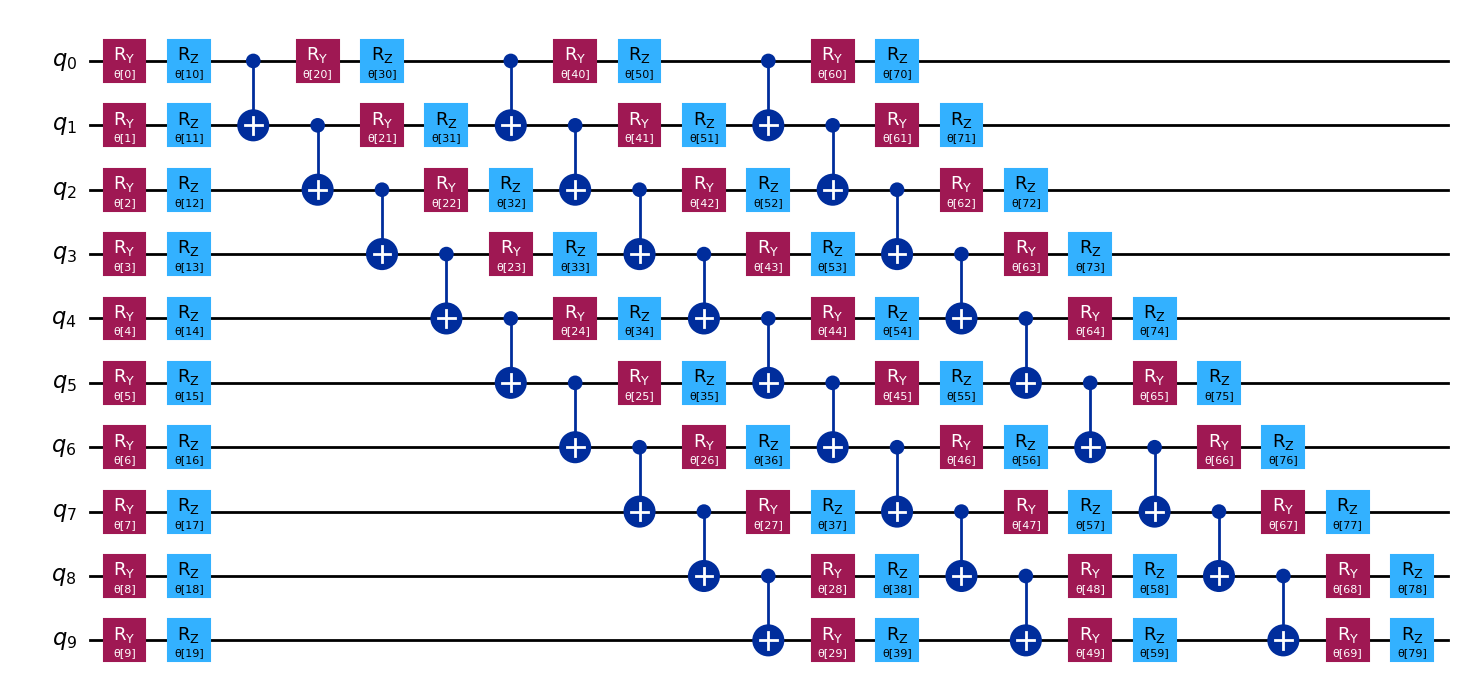

In [16]:
from qiskit.circuit.library import EfficientSU2, UnitaryGate

# Change entanglement strategy to 'linear' or 'circular'
ansatz = EfficientSU2(hamiltonian.num_qubits, entanglement='linear')  # Linear entanglement
ansatz.decompose().draw("mpl", style="iqp")



In [17]:
num_params = ansatz.num_parameters


### Step 10: Run the Sampler Job Locally Using a Fake Backend

In this step, we run the ansatz on a **fake backend** provided by Qiskit, which simulates a real quantum device for testing and debugging purposes. We also use a **preset pass manager** to optimize the quantum circuit and transpile it to a form suitable for the backend.

#### Key Points:
- **Fake Backend**: Qiskit provides fake backends (such as `FakeMelbourneV2`) that simulate the behavior of real quantum devices. This allows us to run and test quantum circuits without needing access to an actual quantum computer.
- **Preset Pass Manager**: The **preset pass manager** is used to optimize and transpile the quantum circuit for the specific fake backend. Transpilation is the process of transforming a circuit into a form that is compatible with a specific quantum device.
- **Optimization Level**: The optimization level in Qiskit ranges from 0 to 3, where 3 represents the highest level of optimization, aiming to reduce gate count and depth.


In [18]:
# Run the sampler job locally using FakeManilaV2
fake_paris = FakeMelbourneV2()
target = fake_paris.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

# Transpile the ansatz for the backend
ansatz_isa = pm.run(ansatz)


In [19]:
hamiltonian_isa = hamiltonian.apply_layout(layout=ansatz_isa.layout)

In [20]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy


In [21]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [22]:
x0 = 2 * np.pi * np.random.random(num_params)


In [23]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.primitives import StatevectorSampler as Sampler
estimator = Estimator()
sampler = Sampler()

In [25]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

start_time = time.time()

res = minimize(cost_func_vqe, x0, args=(ansatz_isa, hamiltonian_isa, estimator), method="L-BFGS-B", options={'maxiter': 100, 'disp': True})

end_time = time.time()
execution_time = end_time - start_time

ModuleNotFoundError: No module named 'qiskit.algorithms'

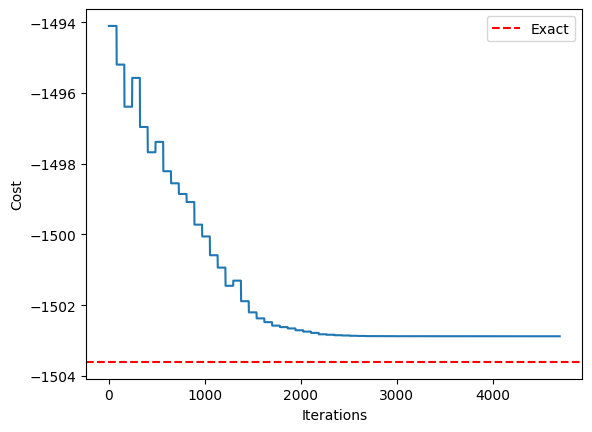

In [17]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")

# Add a red horizontal line 
#ax.axhline(y=-1503.60290056 , color='red', linestyle='--', label="Exact")

# Add a label for the red line
ax.legend()

plt.draw()


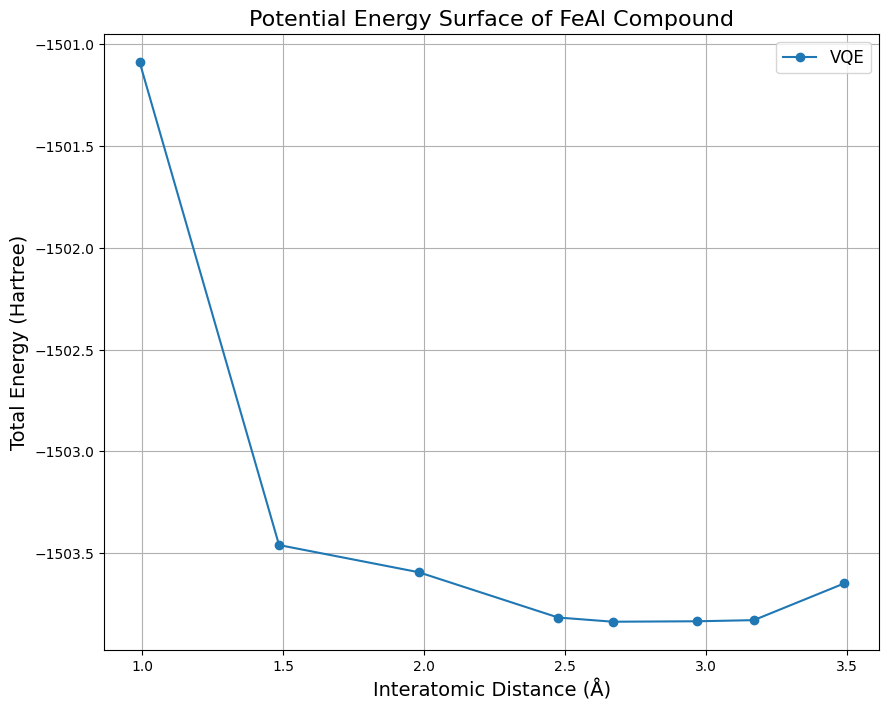

In [6]:
import matplotlib.pyplot as plt

# Function to create a dictionary of bond lengths and energies for multiple methods
def create_bond_energy_dict():
    bond_energy_dict = {
        "VQE": {}
    }
    
    # Add bond lengths and corresponding energy values for Method1
    bond_energy_dict["VQE"][0.991] = -1501.0853674235334
    bond_energy_dict["VQE"][1.486] = -1503.4605861712380
    bond_energy_dict["VQE"][1.981] = -1503.5940099034015
    bond_energy_dict["VQE"][2.476] = -1503.8167299594347
    bond_energy_dict["VQE"][2.67] = -1503.8373756845533
    bond_energy_dict["VQE"][2.97] = -1503.8351690361296
    bond_energy_dict["VQE"][3.17] = -1503.8296351101483
    bond_energy_dict["VQE"][3.49] = -1503.64941059

    return bond_energy_dict

# Function to calculate energy differences and plot the curve for each method
def plot_bond_length_vs_energy(bond_energy_dict):
    plt.figure(figsize=(10, 8))
    
    # Loop over each method
    for method, energy_dict in bond_energy_dict.items():
        if not energy_dict:  # Skip methods with no data
            continue

        # Extract bond lengths and energies from the dictionary
        bond_lengths = list(energy_dict.keys())
        energies = list(energy_dict.values())

        # Plot bond length vs. energy
        plt.plot(bond_lengths, energies, 'o-', label=f"{method}")

    # Plot formatting
    plt.xlabel("Interatomic Distance (Å)", fontsize=14)
    plt.ylabel("Total Energy (Hartree)", fontsize=14)
    plt.title("Potential Energy Surface of FeAl Compound", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)

    # Save the plot as a high-quality image
    plt.savefig("bond_length_vs_energy.png", dpi=300, bbox_inches='tight')
    plt.show()

# Main function to create bond-energy dictionary and plot
def main():
    # Create the bond-energy dictionary for Method1
    bond_energy_dict = create_bond_energy_dict()

    # Plot bond length vs energy curve for Method1
    plot_bond_length_vs_energy(bond_energy_dict)

# Run the main function
if __name__ == "__main__":
    main()
